# Machine Learning 2

## Trabajo integrador

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento


# Enunciado

La consigna del TP a entregar la última clase debería ser un informe en el cual se evidencie la aplicación de distintos algoritmos sobre el dataset elegido.

Deberán incluir: 
- Código
- Evaluación. Métricas.
- Gráficos explicativos
- Conclusiones

## Dataset Elegido

World Happiness Report: El índice global de felicidad es una publicación anual de las Naciones Unidas que mide la felicidad en 157 países, basándose en diversos factores, como el PIB per cápita. 

Se analizará la información provista por el WHR en conjunción con informacion geográfica y económica complementaria. 

## Preguntas relevantes

- ¿Qué variables se tienen en cuenta para medir la felicidad?
- ¿Qué variables tienen más injerencia sobre la felicidad?
- ¿Cómo se ve el mapa de la felicidad?



# Resolución
## Importar librerías

In [1]:
!conda activate datascience

In [2]:
# !pip install plotly

import numpy as np

import os

# MATPLOTLIB & SNS
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

#PANDAS
import pandas as pd
import sqlite3
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import binarize
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import auc, mean_squared_error, r2_score, hinge_loss

# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter labextension install jupyterlab-plotly@4.11.0

## Limpieza de datos y Cargado de bases en sqlite3  
### PATHS

In [3]:
PATHS = [*os.walk('./Data')]
PATHS = [PATHS[0][0]+'/'+j for j in PATHS[0][2]]
PATHS

['./Data/2015.csv',
 './Data/2016.csv',
 './Data/2017.csv',
 './Data/2018.csv',
 './Data/2019.csv',
 './Data/wikipedia-iso-country-codes.csv',
 './Data/WorldRegionsContinentsCountries.csv']

### Cargar los datasets

In [4]:
df_2015 = pd.read_csv(PATHS[0])
df_2016 = pd.read_csv(PATHS[1])
df_2017 = pd.read_csv(PATHS[2])
df_2018 = pd.read_csv(PATHS[3])
df_2019 = pd.read_csv(PATHS[4])
df_country_codes = pd.read_csv(PATHS[5])
df_country_continents = pd.read_csv(PATHS[6], encoding='iso8859_2')

### Corrección de títulos y concatenación de bases

In [5]:
df_2015 = df_2015.rename(columns={'Country':'country',
               'Region': 'region',
               'Happiness Rank':'happiness_rank',
               'Happiness Score': 'happiness_score',
                'Standard Error': 'standard_error',
                'Economy (GDP per Capita)':'gdp_per_capita', 
                'Family': 'family',
                'Health (Life Expectancy)': 'life_expectancy', 
                'Freedom':'freedom', 
                'Trust (Government Corruption)':'trust_corruption',
                'Generosity': 'generosity', 
                'Dystopia Residual': 'dystopia'})

df_2015['anio'] = 2015 

df_2015.drop('standard_error', axis=1, errors='ignore', inplace=True)

# No standard error, upper and lower CI
      
df_2016 = df_2016.rename(columns={'Country':'country',
               'Region': 'region',
               'Happiness Rank':'happiness_rank',
               'Happiness Score': 'happiness_score',
                'Standard Error': 'standard_error',
                'Lower Confidence Interval':'lower_ci', 
                'Upper Confidence Interval': 'upper_ci',
                'Economy (GDP per Capita)':'gdp_per_capita', 
                'Family': 'family',
                'Health (Life Expectancy)': 'life_expectancy', 
                'Freedom':'freedom', 
                'Trust (Government Corruption)':'trust_corruption',
                'Generosity': 'generosity', 
                'Dystopia Residual': 'dystopia'})

df_2016['anio'] = 2016

df_2016.drop(['lower_ci','upper_ci'] , axis=1, errors='ignore', inplace=True)

# No standard error, upper and lower CI

df_2017 = df_2017.rename(columns={'Country':'country',
               'Region': 'region',
               'Happiness.Rank':'happiness_rank',
               'Happiness.Score': 'happiness_score',
                'Standard Error': 'standard_error',
                'Whisker.low':'lower_ci', 
                'Whisker.high' : 'upper_ci',
                'Economy..GDP.per.Capita.':'gdp_per_capita', 
                'Family': 'family',
                'Health..Life.Expectancy.': 'life_expectancy', 
                'Freedom':'freedom', 
                'Trust..Government.Corruption.':'trust_corruption',
                'Generosity': 'generosity', 
                'Dystopia.Residual': 'dystopia'})

df_2017['anio'] = 2017
df_2017.drop(['lower_ci','upper_ci'] , axis=1, errors='ignore', inplace=True)

df_2018 = df_2018.rename(columns={'Country or region':'country',
               'Overall rank':'happiness_rank',
               'Score': 'happiness_score',
                'Standard Error': 'standard_error',
                'Whisker.low':'lower_ci', 
                'Whisker.high' : 'upper_ci',
                'GDP per capita':'gdp_per_capita', 
                'Family': 'family',
                'Healthy life expectancy': 'life_expectancy', 
                'Freedom to make life choices':'freedom', 
                'Perceptions of corruption':'trust_corruption',
                'Generosity': 'generosity', 
                'Social support': 'family'})

df_2018['anio'] = 2018
df_2018.drop(['lower_ci','upper_ci'] , axis=1, errors='ignore', inplace=True)
# No está Family ni whiskers

df_2019 = df_2019.rename(columns={'Country or region':'country',
               'Overall rank':'happiness_rank',
               'Score': 'happiness_score',
                'GDP per capita':'gdp_per_capita', 
                'Healthy life expectancy': 'life_expectancy', 
                'Freedom to make life choices':'freedom', 
                'Perceptions of corruption':'trust_corruption',
                'Generosity': 'generosity', 
                'Social support': 'family'})

df_2019['anio'] = 2019


df_final = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019])
df_final.drop('dystopia', axis=1, inplace=True, errors='ignore')

In [6]:
df_country_codes= df_country_codes.rename(columns={'English short name lower case':'country',
                                                   'Alpha-2 code': 'ISO_ALPHA_2',
                                                   'Alpha-3 code': 'ISO_ALPHA_3',
                                                   'Numeric code': 'NUMERIC_CODE',
                                                   'ISO 3166-2':'ISO_3166_2'})

df_country_continents= df_country_continents.rename(columns={'Country Name (usual)':'country',
                                                            'Continent': 'continent',
                                                            'Economic Region': 'economic_region',
                                                            })
df_country_continents = df_country_continents[['country', 'continent','economic_region']]

### Creamos el conector y cargamos la base de datos (fines didácticos)

In [7]:
conn = sqlite3.connect('db_happiness.db')

# Eliminar tabla de base
#cursor = conn.cursor()
#cursor.execute('DROP TABLE happiness;')
#conn.commit()
 
#Guardar tablas a base de datos

#df_final.to_sql('happiness', conn)
#df_country_codes.to_sql('geolocation', conn)
#df_country_continents.to_sql('continents', conn)


### Levantamos el dataset con queries

In [8]:
# Análisis de felicidad geográfico

df_complete = pd.read_sql("SELECT *\
            FROM happiness as H\
            ORDER BY H.anio, H.happiness_rank", conn)

df_complete = df_complete[df_complete['trust_corruption'].notna()]

df_complete.drop('index', inplace= True, axis=1, errors='ignore')

## Descripción de las variables

Las variables que se toamron en cosideración son las provistas por el reporte:

- **País:** Un país es, por lo tanto, una determinada área geográfica y una entidad políticamente independiente, que cuenta con su propio gobierno, administración, leyes, fuerzas de seguridad y, por su puesto, población.
- **Región:** Región geográfica a la cuál pertenece el país.
- **Ranking de felicidad:** Valor que ordena los países en nivel de felicidad en orden descendente.
- **Score de Felicidad**: Puntaje que el país ha obtenido en nivel de felicidad.
- **PBI per capita**: PBI por habitante del país.
- **Familia:** Calidez y fortaleza de los vínculos familiares
- **Esperanza de vida:** Es la media de la cantidad de años que vive una determinada población absoluta o total en un cierto período.
- **Libertad de realizar decisiones de vida:** La libertad de elegir la vida es el promedio nacional de respuestas binarias a la pregunta de GWP "¿Está satisfecho o insatisfecho con su libertad de elegir lo que hace con su vida?" 
- **Corrupción:** el promedio de respuestas binarias a dos preguntas de GWP: "¿Está la corrupción extendida en el gobierno o no?" y "¿Está la corrupción extendida en las empresas o no?" 
- **Generosidad:**  Es el residuo de la regresión del promedio nacional de las respuestas del GWP a la pregunta "¿Ha donado dinero a una organización benéfica en el último mes?" sobre el PIB per cápita. 
- **Dystopia:**  La relación con la de un país hipotético llamado Distopía. Utilizamos Dystopia como punto de referencia para comparar el desempeño de cada país en términos de cada uno de los seis factores. 

- **Año:** Año de la encuesta

## Análisis de correlación de las variables



<AxesSubplot:>

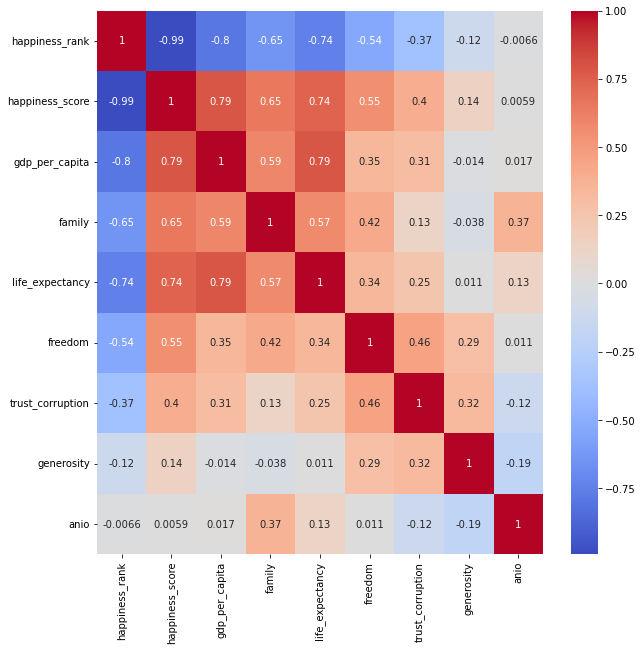

In [9]:
correlation_matrix = df_complete.corr()

fig, ax = plt.subplots(figsize=[10,10])

# ax.spines['bottom'].set_color('w')
# ax.spines['left'].set_color('w')
# ax.xaxis.label.set_color('w')
# ax.tick_params(axis='x', colors='w')
# ax.tick_params(axis='y', colors='w')

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True )

## Análisis exploratorio

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781 entries, 0 to 781
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           781 non-null    object 
 1   region            315 non-null    object 
 2   happiness_rank    781 non-null    int64  
 3   happiness_score   781 non-null    float64
 4   gdp_per_capita    781 non-null    float64
 5   family            781 non-null    float64
 6   life_expectancy   781 non-null    float64
 7   freedom           781 non-null    float64
 8   trust_corruption  781 non-null    float64
 9   generosity        781 non-null    float64
 10  anio              781 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 73.2+ KB
None


happiness_rank  happiness_score  gdp_per_capita      family  \
count      781.000000       781.000000      781.000000  781.000000   
mean        78.773367         5.377232        0.914537    1.078780   
std         45.162398         1.127071        0.405403    0.329581   
min          1.000000         2.693000        0.000000    0.000000   
25%         40.000000         4.509000        0.605000    0.870210   
50%         79.000000         5.321000        0.982000    1.125000   
75%        118.000000         6.182000        1.233748    1.328000   
max        158.000000         7.769000        1.870766    1.644000   

       life_expectancy     freedom  trust_corruption  generosity         anio  
count       781.000000  781.000000        781.000000  781.000000   781.000000  
mean          0.612342    0.411254          0.125436    0.218618  2016.992318  
std           0.248459    0.152911          0.105816    0.122394     1.417814  
min           0.000000    0.000000          0.000000    0.000000  2015.000000  
25%           0.440060    0.310480          0.054000    0.130000  2016.000000  
50%           0.647239    0.431000          0.091000    0.202000  2017.000000  
75%           0.808000    0.531000          0.156030    0.279060  2018.000000  
max           1.141000    0.724000          0.551910    0.838075  2019.000000

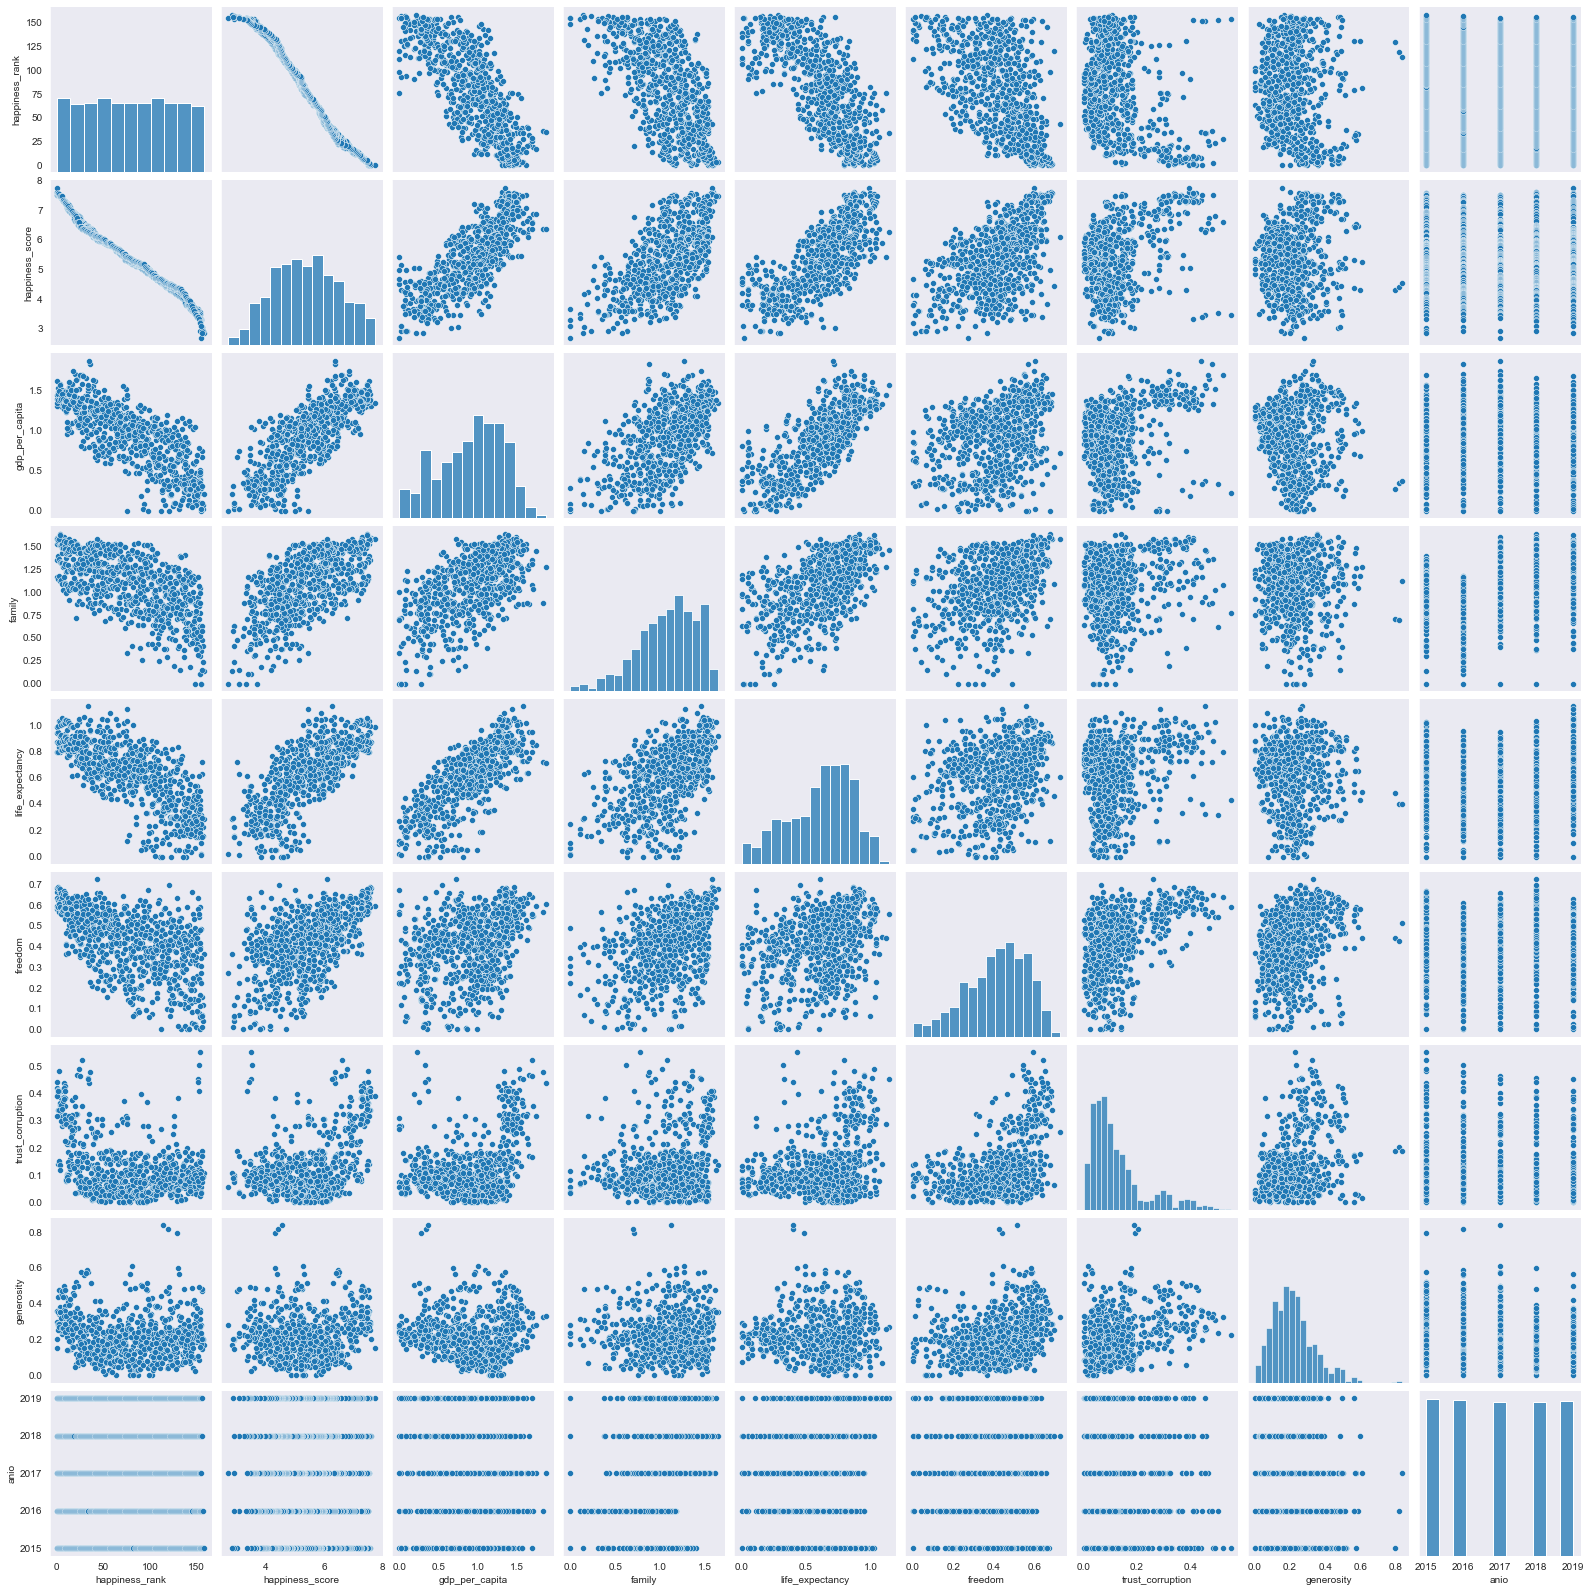

In [10]:
print(df_complete.info())

sns.set_style("dark")

sns.pairplot(df_complete)

df_complete.describe()

### Felicidad por continente

In [11]:
# Análisis de felicidad temporal

score_continent = pd.read_sql("SELECT H.anio, C.continent, H.country, AVG(H.happiness_score) as score_happiness\
            FROM happiness as H\
            LEFT JOIN continents as C on H.country = C.country\
            WHERE C.continent <> 'None'\
            GROUP BY H.anio, C.continent\
            ORDER BY H.anio", conn)


px.line(score_continent,
        x='anio', 
        y='score_happiness',
        line_group='continent',
        text='continent',
        title = 'Evolución de la felicidad en el tiempo en continentes')

In [12]:
# Geolocalizada

fig = px.scatter_geo(score_continent, 
                     locations="country",
                     hover_name="continent", 
                     size="score_happiness",
                     animation_frame="anio", 
                     projection="natural earth",
                     locationmode='country names',
                     text='continent')
fig.update_geos(
    visible=True, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")

fig.show()

### Felicidad por País

In [13]:
# Análisis de felicidad temporal

score_countries_years = pd.read_sql("SELECT H.anio, H.country, AVG(H.happiness_score) as happiness_score\
            FROM happiness as H\
            LEFT JOIN continents as C on H.country = C.country\
            GROUP BY H.anio, H.country\
            ORDER BY H.anio", conn)

fig = px.scatter_geo(score_countries_years, 
                     locations="country",
                     hover_name="country", 
                     color="happiness_score",
                     animation_frame="anio", 
                     projection="natural earth",
                     locationmode='country names' )
fig.update_geos(
    visible=False, resolution=50,
    showcountries=True, countrycolor="RebeccaPurple")

fig.show()

In [14]:
score_countries_years.pivot(index='country', columns='anio', values='happiness_score')

anio          2015   2016   2017   2018   2019
country                                       
Afghanistan  3.575  3.360  3.794  3.632  3.203
Albania      4.959  4.655  4.644  4.586  4.719
Algeria      5.605  6.355  5.872  5.295  5.211
Angola       4.033  3.866  3.795  3.795    NaN
Argentina    6.574  6.650  6.599  6.388  6.086
...            ...    ...    ...    ...    ...
Venezuela    6.810  6.084  5.250  4.806  4.707
Vietnam      5.360  5.061  5.074  5.103  5.175
Yemen        4.077  3.724  3.593  3.355  3.380
Zambia       5.129  4.795  4.514  4.377  4.107
Zimbabwe     4.610  4.193  3.875  3.692  3.663

[170 rows x 5 columns]

# Preparación de datos para aplicar modelos

Disclamer: No tiene mucho sentido buscar un modelo que explique la felicidad dadas las variables consideradas.. Dado que hay una relación aritmética entre las variables antes descriptas y el score..

Se va a realizar el análisis de todas maneras por fines didácticos

In [15]:
X = df_complete.drop(['happiness_score', 'happiness_rank', 'country', 'region'], axis=1)
y = df_complete[['happiness_score']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.9)

# Selección de modelos

In [16]:
linear_model = LinearRegression()
svr_model = SVR(kernel='poly',
                degree=2, 
                C=100, 
                epsilon=0.1)
regressiontree_model = DecisionTreeRegressor()
rfr_model = RandomForestRegressor(n_estimators=1000)

mse_error = []
r_2 = []

models = [linear_model, svr_model, regressiontree_model, rfr_model]

for model in models:
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    mse_error.append(mean_squared_error(y_val, y_pred))
    r_2.append(r2_score(y_val, y_pred))
    
print(f'The mean squared errors are\n{mse_error}')

print(f'The r2 are\n{r_2}')

linear_model.coef_

The mean squared errors are
[0.334006540934872, 1.230542653291028, 0.5023868501143046, 0.3272608308804834]
The r2 are
[0.7286402948002197, 0.00026002275829739574, 0.5918416832146818, 0.7341207679867584]


array([ 0.69589554,  0.74660313,  0.94560869,  2.03435178,  1.51677286,
        0.86199517, -0.08436116])

El mejor modelo hasta ahora es la regresión lineal, lo que tiene sentido.. Pues el score de felicidad es producto de una relación aritmética entre las variables de entrada.

### Planteo de Problema nº 2

Dado que el problema planteado anteriormente no representaba una pregunta cuya respuesta se desconociece, trataré de responder la siguiente pregunta:

- ¿Hay acaso algún patrón que caracterice la felicidad por continentes?

La hipótesis detrás de esta pregunta es que la cercanía geográfica genera un acercamiento socioeconómico y cultural que permite distinguir los continentes de acuerdo a los perfiles de felicidad de sus paises.

In [19]:
! pip install lightgbm

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report

In [20]:
df = pd.read_sql("SELECT happiness_score, gdp_per_capita, family, life_expectancy, freedom, trust_corruption, generosity, anio, continent\
            FROM happiness as H\
            LEFT JOIN continents as C on H.country = C.country\
            GROUP BY H.anio, H.country\
            ORDER BY H.anio", conn)

df = df[df.continent.notna()]
df = df[df.trust_corruption.notna()]

X = df.drop(['continent'], axis=1)
y = df[['continent']].values.ravel()

# Encoding de variables categóricas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['continent'])


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)


In [21]:
class BaseModel(object):
    def fit(self, X, y):
        return NotImplemented
    
    def predict(self, X):
        return np.random.randint(0, 5, size=X.shape[0])
    
bm_model = BaseModel()

bm_model.fit(X_train, y_train)

y_pred = bm_model.predict(X_test)

score = classification_report(y_true=y_test, y_pred=y_pred)

print(score)

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        40
           1       0.40      0.31      0.35        39
           2       0.29      0.21      0.24        38
           3       0.12      0.25      0.16        12
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        10

    accuracy                           0.23       141
   macro avg       0.20      0.17      0.18       141
weighted avg       0.31      0.23      0.26       141



C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Los resultados arrojados completamente al azar arrojan un accuracy de 0.15. Cualquier resultado mejor que este implicará una mejora frente al azar.

#### Random Forest Classifier

In [22]:
rf_model = RandomForestClassifier(random_state=0,
                                  n_estimators=200,
                                  criterion='entropy', 
                                  max_features='log2', 
                                  max_depth=10)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

score = classification_report(y_true=y_test, y_pred=y_pred)

print(score)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.76      0.82      0.79        39
           2       0.77      0.87      0.81        38
           3       0.60      0.50      0.55        12
           4       0.00      0.00      0.00         2
           5       0.67      0.60      0.63        10

    accuracy                           0.80       141
   macro avg       0.63      0.61      0.62       141
weighted avg       0.79      0.80      0.79       141



C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\MOREJ2\Anaconda3\envs\venv_fuse_rm\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Support Vector Classifier

In [26]:
svc_model = SVC(C=1, 
                gamma='auto',
                kernel = 'poly',
                decision_function_shape='ovo')

svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

score = classification_report(y_true=y_test, y_pred=y_pred)

print(score)

#### KNeighbors Classifier

In [23]:
kneighbors_model = KNeighborsClassifier(n_neighbors=3, weights='distance', )

kneighbors_model.fit(X_train, y_train)

y_pred = kneighbors_model.predict(X_test)

score = classification_report(y_true=y_test, y_pred=y_pred)

print(score)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.50      0.38      0.43        39
           2       0.64      0.66      0.65        38
           3       0.17      0.17      0.17        12
           4       0.20      0.50      0.29         2
           5       0.44      0.70      0.54        10

    accuracy                           0.58       141
   macro avg       0.46      0.53      0.48       141
weighted avg       0.59      0.58      0.58       141



#### Light Gradient Boosting Machine Classifier

In [30]:
lgbm_model = LGBMClassifier(random_state=0,
                                  n_estimators=1000,
                                  max_depth=30)

lgbm_model.fit(X_train, y_train)

lgbm_model = rf_model.predict(X_test)

score = classification_report(y_true=y_test, y_pred=y_pred)

print(score)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.50      0.38      0.43        39
           2       0.64      0.66      0.65        38
           3       0.17      0.17      0.17        12
           4       0.20      0.50      0.29         2
           5       0.44      0.70      0.54        10

    accuracy                           0.58       141
   macro avg       0.46      0.53      0.48       141
weighted avg       0.59      0.58      0.58       141



## Conclusiones de la selección del modelo

Como se puede observar, el modelo random forest es el modelo que arrojó mejores métricas. Se puede observar que ninguno de los modelos predijo correctamente la categoría 4 ( ). Esto se debe a que no hay una desproporición muy grande entre la cantidad de países por continente y se suma a que los features de norteamérica son muy similares a los perfiles de felicidad europeo.

Definido el modelo correcto, el objetivo ahora será tratar de explicar el proceso de decisión del modelo. Comprender los patrones que utiliza el modelo para definir a qué continente se trata permitirá generar conocimiento de los perfiles de felicidad en los distintos continentes. 

## Optimización de Hiperparámetros para el modelo seleccionado

In [34]:
from sklearn.model_selection import RandomizedSearchCV


parameters =  {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

model = RandomForestClassifier()

search = RandomizedSearchCV(model, parameters, n_iter=500, scoring='accuracy', n_jobs=-1, random_state=1)

result = search.fit(X, y)

In [35]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8170212765957447
Best Hyperparameters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


### Optimización de Hiperparametros con métdos bayesianos

In [36]:
!pip install hyperopt

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")


In [37]:
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    'max_features': hp.choice('max_features', ['auto', 'sqrt']),
    'min_samples_leaf': hp.choice('min_samples_leaf',[1, 2, 4]),
    'min_samples_split': hp.choice('min_samples_split',[2, 5, 10]),
}

# define objective function

def hyperparameter_tuning(params):
    clf = RandomForestClassifier(**params,n_jobs=2)
    acc = cross_val_score(clf, X, y,scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [38]:
# Initialize trials object
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 100/100 [06:02<00:00,  3.62s/trial, best loss: -0.8042553191489361]
Best: {'criterion': 1, 'max_depth': 11.0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 0, 'n_estimators': 2}


Se encontraron entonces los hiperparametros que optimizan la accuracy del modelo con el dataset elegido. El RandomSearchCV tuvo mejor resultados dado que lo corrimos con mayou cantidad de posibilidades, arrojando un resultado y parámetros iguales a:

Best Score: 0.8170212765957447
Best Hyperparameters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}